<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# Programa de Especialización en Python

## Caso: Random Forest aplicado a Modelo de Contatabilidad con H2O

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

In [77]:
from IPython.display import Image
%matplotlib inline

# <a id='part1'></a>
## Bagging

- Bootstrap es usado en muchas situaciones en las cuales es complicado o imposible calcular directamente la desviación estándar de una cantidad de interés
<br>

- Los árboles de decisión padecen por tener una gran varianza.
<br>

- Esto quiere decir que si nosotros dividimos la data de entrenamiento en dos partes de manera aleatoria y ajustamos un árbol de decisión en ambas mitades, los resultados pueden ser bastante diferentes.
<br>

- $Bootstrap aggregation$, or, $bagging$, es un procedimiento que busca reducir la varianza en un método de aprendizaje estadístico.

- Recordar: Data un conjunto de observaciones independientes $Z_1, ..., Z_n$,  cada uno con varianza $\sigma^2$, la varianza de la media $\bar{Z}$ de las observaciones reduce la varianza.
<br>

- En otras palabras, el promediar un conjunto de observaciones reduce la varianza.
<br>

- Una forma natural de reducir la varianza e incrementar la precisión en la predicción de un método de aprendizaje estadístico es tomar muchas muestras de entrenamiento de la población, contruir muchas muestras de entrenamiento de la población, construir un modelo predictivo por separado usando cada conjunto de entreenamiento y promediar los resultados de las predicciones.

- En otras palabras podemos calcular $\hat{f}^1(x),\hat{f}^2(x), ..., \hat{f}^B(x)$ usando B conjuntos de entrenamiento separados, y promediarlos para obtener un modelo de aprendizaje estadístico de baja varianza dado por:
$$\hat{f}_{avg}(x)=\frac{1}{B}\sum^B_{b=1}\hat{f}^b(x)$$
<br>

- Obivamente este enfoque no es práctico porque generalmente no tenemos acceso a múltiples repetidas de un sólo conjunto de entrenamiento.
<br>

- Bajo este enfoque generamos B diferentes muestras de entrenamiento por $bootstraping$.

- Se entrena el método en la b-ésima muestra de entrenamiento parta obtener $\hat{b}^{*b}(x)$ y finalmente promediar todas las predicciones obteniendo:
<br>

$$\hat{f}_{bag}(x)=\frac{1}{B}\sum^{B}_{b=1}\hat{f}^{*b}(x)$$
<br>

- El cual es llamado bagging
<br>

- El método anterior es utilizado en árboles de regresión. Para el caso de clasificación, se registra la clase predicha para cada observación en cada uno de los B árboles y se toma aquella con mayor frecuencia (voto mayoritario).

### Error de Estiamción $Out-of-Bag$ 

- Hay una forma sencilla de estimar el eror de estimación de un modelo agregado por bagging sin la necesidad de usar validación cruzada o usar el enfoque de usar una muestra de validación
<br>

- Es posible demostrar que, en promedio, cada árbol agregado por bagging usa el promedio larededor de dos tercios de las observaciones (ver James et al, capítulo 5).
<br>

- El tercio restante de las observaciones que no son usadas para ajustar el árbol son conocidas como las observaciones $out-of-bag$ (OOB).
<br>

- Podemos predecir la respuesta para la i-esima observación usando cada uno de los árboles en que dicha observación estaba OOB.

- Esto da alerededor de $B/3$ predicciones para la i-ésima observación.
<br>

- Para obtener una predicción individual de la i-ésima observación se usa la estrategia de voto mayoritario.
<br>

- La predicción OOB puede ser obtenida de esta forma para cada una de las **n** observaciones, para los cuales se calcula el error de clasificación.
<br>

- El error OOB resultante es una estiamción válida del error de prueba para el modelo agregado por bagging, dado que la respuesta para cada observación es predicha usando solamente los árboles en los cuales la observación no fue usada para el ajuste.

**Gráfica de Error en la clasificación**

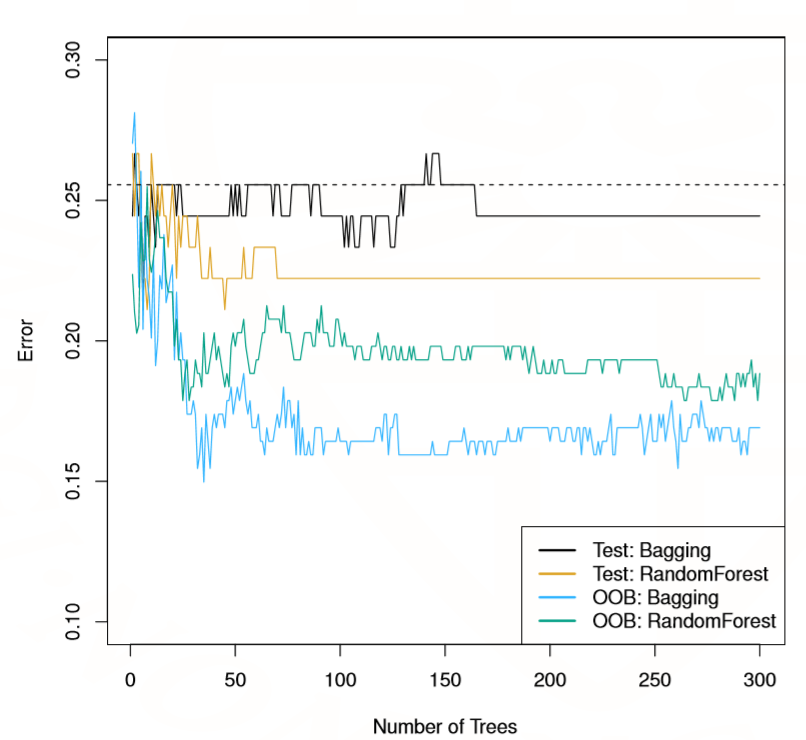

In [78]:
Image(filename='D:/Python/3. Nivel III/2/imagenes/imagen22.png', width=400) 

### Medidas de la Importancia de la Variable

- Bagging tipícamente resulta en una mejora de la precisión sobre la predicción usando un sólo árbol.
<br>

- Desafortunadamente, puede ser díficil de interpretar el modelo resultante.
<br>

- Recordar que una de las ventajas de los árboles de decisión era la facilidad para interpretar el diagrama resultante.
<br>

- Cuando se agregan un gran número de árboles, no es posible representar el procedimiento estadísitico de aprendizaje usando un sólo árbol, y no queda tan claro cuales son las variables más importantes para el procedimiento.
<br>

- En otras palabras, bagging mejora la precisión en la predicción a expensas de la interpretabilidad.

- A pesar de que la colección de árboles agregados es más dificil de interpretar que un solo árbol, es posible obtener un resumen de la importancia de cada predictor usando el índice Gini.
<br>

- El resumen puede obtenerser añadiendo la cantidad total en que el indice de Gini es reducido por las divisiones sobre el predictor, promediado sobre todos los B árboles.

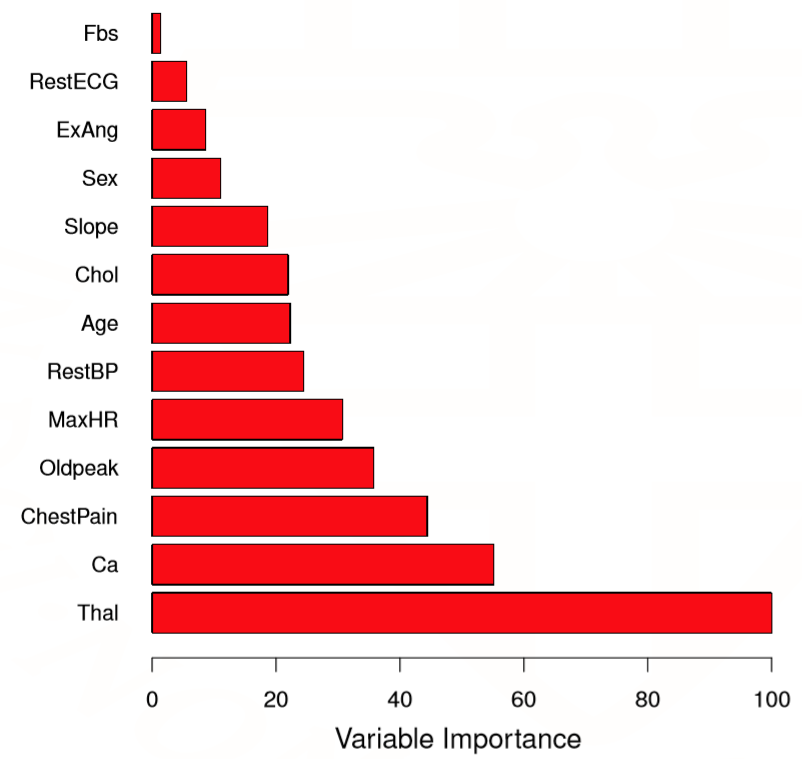

In [79]:
Image(filename='D:/Python/3. Nivel III/2/imagenes/imagen23.png', width=400) 

<a id='part2'></a>
## Random Forest I

- Random Forest proporcionan una mejora sobre los árboles agregados por bagging realizando un pequeño ajuste que descorrelacion a los árboles.
<br>

- De manera similar al bagging, se construye un número de árboles de decisión realizando un bootstrapping de las muestras de entrenamiento.
<br>

- Cuando se construye el árbol de decisión, cada vez que se considera una división, una muestra aleatoria de $m$ predictores es seleccionada como candidatos para la división dentro del conjunto total de p predictores.
<br>

- La división es permitida de usar solamente uno de los m predictores

- Una nueva muestra de m predictores es tomada en cada división, y tipicamente se elige $m\thickapprox \sqrt{p}$. 
<br>

- En otras palabras, en cada división del árbol, el algoritmo no permite que se consideren a la mayoría de los predictores.
<br>

- Si existiera un predictor demasiado fuerte en el conjunto de datos, mientras el resto de los predictores tiene una fuerza moderada, entonces la mayoría de árboles agregados por bagging usarán este predictor al inicio altamente correlacionadas.
<br>

- Como consecuencia la mayoría de loa árboles lucirán similares unos a los otros y las predicciones estarán altamente correlacionadas.
<br>

- Desafortunadamente, promediar muchas cantidades altamente correlacionada no ayudan a conseguir una gran reducción de la varianza.

- En otras palabras, bagging no lógrara una substancial reducción de la varianza en comparación con un solo árbol en situaciones de este tipo.
<br>

- Random Forests supera este problema forzando a que cada partición considere solamente un subconjunto de predictores.
<br>

- En promedio, $(p-m)/p$ de las divisiones no considerarán el predictor más fuerte, de tal forma que otros predictores tienen la oportunidad de ser seleccionados.
<br>

- Podemos pensar en este proceso como una descorrelación de los árboles, haciendo que el promedio de los árboles sea menis variable y más fiables.
<br>

- La principal diferencia entre bagging y random forets es la elección del subconjunto de predictores $m$.

- Si Random Forest es construido con $m = p$ es similar a realizar bagging.
<br>

- Usar un valor pequeño de $m$ en la construcción de random forests será de grán ayuda cuando se tiene una gran cantidad de predictores correlacionados.

**Resultados con Random Forest**

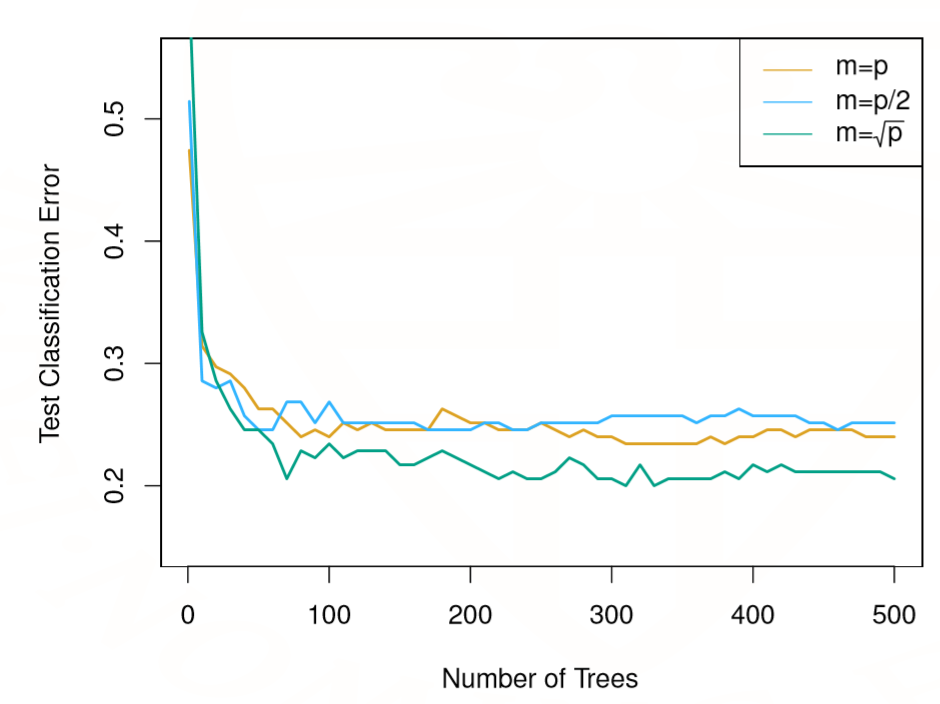

In [80]:
Image(filename='D:/Python/3. Nivel III/2/imagenes/imagen24.png', width=400) 

## Boosting y AdaBoost I

- Boosting y la variante más usada AdaBoost (Adapting Boosting) genera un conjunto de clasificadores.
<br>

- Sin embargo, AdaBoost los genera secuencialmente (Bagging los puede generar en paralelo).
<br>

- A todos los ejemplos, les asigna inicialmente un peso igual $(1/m)$.
<br>

- Cada vez que se genera un clasificador, se cambian los pesos de los nuevos ejemplo usados para le siguiente clasificador. 
<br>

- La idea es forzar al nuevo clasificador a minimizar el error esperado. Para esto se les asigna más peso a los ejemplo mal clasificados y menos a los bien clasificados.

- La idea es alentar crear modelos que se vuelvan "expertos" en los datos que no pudieron ser explicados por los modelos anteriores.
<br>

- Después de cada interacción los pesos reflejan que tan seguido las instancias han sido mal clasificadas por los clasificadores que se tienen hasta el momento.
<br>

- Se generan igual $B$ clasificadores de muestras de ejemplos pesadas. El clasificador final se forma usando un esquema de votación pesado que depende del desempeño de cada clasificador en su conjunto de entrenamiento.
<br>

- Este algoritmo requiere de clasificadores débiles que cambian su estructura con cambios en los datos y que no dan errores mayores al 50%.

- El algoritmo se para cuando el error en los datos de entrenamiento pesados son mayores o iguales a 0.5 o cuando el error es cero (donde todos los pesos de las instacnias se vuelven 0).
<br>

- Si no se pueden incorporar ejemplo pesados dentro del clasificador, se pueden tener un efecto parecido por medio de un muestreo con reemplazo, seleccionando los ejemplo de acuerdo a su peso.
<br>

- Se puede tener problemas de underflow, por lo que es común eliminar ejemplo con los pesos muy pequeños.
<br>

- Bagging sin pruning a veces reduce el error, Boosting sólo lo aumenta

- En Boosting, si un clasificador tiene un error cero, recibe recomenda infinita y es unico ganador, por lo que generalmente se elimina.

## Sobre el caso

- El objetivo del modelo, es predecir el contacto efectivo o no. Es predecir, en base a las variables presentadas, la posibilidad de que el usuario conteste su teléfono o celular. 
- Para este caso, usaremos dos tipos de arboles decisión.

<a id='part3'></a>
# Importar la data

In [1]:
#pip install rpy2

In [1]:
import numpy as np
import pandas as pd
#import rpy2

In [2]:
FileCSV="D:/Python/3. Nivel III/2/datos/data_selec_entre.csv"
dataCSV=pd.read_csv(FileCSV)
dataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            757391 non-null  float64
 2   TOTGEST6              757391 non-null  int64  
 3   TOTGEST12             757391 non-null  int64  
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              757391 non-null  object 
 7   FBK_ULT12             757391 non-null  object 
 8   FBK_BEST6             757391 non-null  object 
 9   DIAS_BEST6            757391 non-null  int64  
 10  DIAS_ULT6             757391 non-null  int64  
 11  FBK_BEST12            757391 non-null  object 
 12  DIAS_BEST12           757391 non-null  int64  
 13  DIAS_ULT12            757391 non-null  int64  
 14  CNE_CTD12             757391 non-null  int64  
 15  

In [3]:
dataCSV.head()

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.333333,6,6,3,118,TLV,TLV,TLV,8,...,-999,-999.0,-999,TACNA,TACNA,7136,9389,2,Entre S/.4000-10000,1
1,1,0.461538,13,13,40,94,TLV,TLV,TLV,46,...,-999,-999.0,-999,LIMA,LIMA,6920,9105,1BC,Entre S/.4000-10000,1
2,1,0.666667,2,6,6,223,TLV,TLV,TLV,127,...,-999,-999.0,-999,LIMA,LIMA,1473,1655,2,Entre S/.1000-4000,1
3,1,-999.000000,4,4,95,96,TLV,TLV,TLV,49,...,-999,-999.0,-999,LIMA,LIMA,2293,2729,2,Entre S/.1000-4000,1
4,1,0.187500,10,16,4,91,TLV,TLV,TLV,27,...,-999,-999.0,-999,CUSCO,CUSCO,6470,8513,3,Entre S/.4000-10000,1


In [4]:
dataCSV = dataCSV.astype({"TARGET":"object"})

In [5]:
dataCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757391 entries, 0 to 757390
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       757391 non-null  int64  
 1   NC_DISTR12            757391 non-null  float64
 2   TOTGEST6              757391 non-null  int64  
 3   TOTGEST12             757391 non-null  int64  
 4   IDGRUPO               757391 non-null  int64  
 5   DIAS_ACT              757391 non-null  int64  
 6   FBK_ULT6              757391 non-null  object 
 7   FBK_ULT12             757391 non-null  object 
 8   FBK_BEST6             757391 non-null  object 
 9   DIAS_BEST6            757391 non-null  int64  
 10  DIAS_ULT6             757391 non-null  int64  
 11  FBK_BEST12            757391 non-null  object 
 12  DIAS_BEST12           757391 non-null  int64  
 13  DIAS_ULT12            757391 non-null  int64  
 14  CNE_CTD12             757391 non-null  int64  
 15  

In [6]:
dataCSV["TARGET"]=dataCSV["TARGET"].replace(1,"si")

In [7]:
dataCSV["TARGET"]=dataCSV["TARGET"].replace(0,"no")

In [8]:
dataCSV.head()

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,TOTGEST12,IDGRUPO,DIAS_ACT,FBK_ULT6,FBK_ULT12,FBK_BEST6,DIAS_BEST6,...,NT_CTD6,NT_DISTR6,NT_DIAS6,PROVINCIA,DEPARTAMENTO,INGRESO_NETO_VIGENTE,INGRESO_BRUTO,SEGMENTO,RANGO_INGRESOS,TARGET
0,1,0.333333,6,6,3,118,TLV,TLV,TLV,8,...,-999,-999.0,-999,TACNA,TACNA,7136,9389,2,Entre S/.4000-10000,si
1,1,0.461538,13,13,40,94,TLV,TLV,TLV,46,...,-999,-999.0,-999,LIMA,LIMA,6920,9105,1BC,Entre S/.4000-10000,si
2,1,0.666667,2,6,6,223,TLV,TLV,TLV,127,...,-999,-999.0,-999,LIMA,LIMA,1473,1655,2,Entre S/.1000-4000,si
3,1,-999.000000,4,4,95,96,TLV,TLV,TLV,49,...,-999,-999.0,-999,LIMA,LIMA,2293,2729,2,Entre S/.1000-4000,si
4,1,0.187500,10,16,4,91,TLV,TLV,TLV,27,...,-999,-999.0,-999,CUSCO,CUSCO,6470,8513,3,Entre S/.4000-10000,si


In [9]:
len(dataCSV)

757391

In [10]:
colnames = dataCSV.columns.tolist()

In [12]:
predictors = colnames[0:39]

In [15]:
target = colnames[39]

<a id='part5'></a>
# Instalación de H2O

In [5]:
#pip install requests
#pip install tabulate
#pip install "colorama>=0.3.8"
#pip install future 

In [3]:
#!pip install -U h2o

In [9]:
#pip install http://h2o-release.s3.amazonaws.com/h2o/rel-yu/4/Python/h2o-3.28.0.4-py2.py3-none-any.whl

In [16]:
 import h2o

In [17]:
h2o.init (nthreads = -1, max_mem_size = "4g")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpzil6frmp
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpzil6frmp\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmpzil6frmp\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,6 months and 7 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_hg1luy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


Cuando se inicializa h2o, se generará un mensaje que hace referencia a la conexión exitosa de la librería al cluster que realizará los cálculos. El parámetro nthreads = -1 se refiere a que se harán uso de todos los CPU disponibles del equipo para realizarlos.

La versión de H2O en CRAN podría estar hasta un mes o dos detrás de la última y mejor. A menos que se vea afectado por un error que sabe que se ha solucionado, no se preocupe. $h2o.init ()$ solo usará dos núcleos en su máquina y quizás una cuarta parte de la memoria de su sistema, 6 por defecto. Use $h2o.shutdown()$ para ver lo que hace. Luego, para comenzar de nuevo, pero usando todos los núcleos: $h2o.init (nthreads = -1)$. Y para darle, digamos, 4GB y todos sus núcleos: $h2o.init (nthreads = -1, max_mem_size = "4g")$.

[WARNING] in <ipython-input-19-34c66f2ad661> line 1:
    >>> ℎ2𝑜.𝑠ℎ𝑢𝑡𝑑𝑜𝑤𝑛()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_a688 closed.


#### Consideraciones:

1. Algunos sistemas requieren contar con Java para 64 bits. En la carpeta correspondiente a la sesión podemos encontrar el ejecutable: jdk-8u231-windows-x64.exe
2. Debemos tener una versión actualizada del clúster H2O. Nosotros trabajaremos con la versión 3.26.0.2 que se instalará desde el terminal de Windows con la siguiente sentencia: h2o.jar 

<a id='part6'></a>
# Random Forest con H2O

In [18]:
data=h2o.H2OFrame(dataCSV) #convierte un data frame de pandas en un data frame de h2o

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [19]:
type(data)

h2o.frame.H2OFrame

In [20]:
import os
import h2o

In [21]:
#If next line fails, instead set path to datasets location.
data2 = h2o.import_file("D:/Python/3. Nivel III/2/datos/data_selec_entre.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
type(data2)

h2o.frame.H2OFrame

In [23]:
m = h2o.estimators.H2ORandomForestEstimator(nfolds=10, #CV- las participones de los datos
                                            max_depth=3,#profundidad máxima de los árboles
                                            ntrees=50, #número de árboles
                                            seed=2020) #semilla

In [20]:
#model = h2o.estimators.H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10)

In [ ]:
#ntrees= número de árboles que se generan
#maxdepth = profundidad del árbol
#nfolds = 10

In [24]:
m.train(x=predictors, #etiquetas de los predictores
        y= target, #etiqueta del target
        training_frame=data) #data

drf Model Build progress: |███████████████████████████████████████████████| 100%


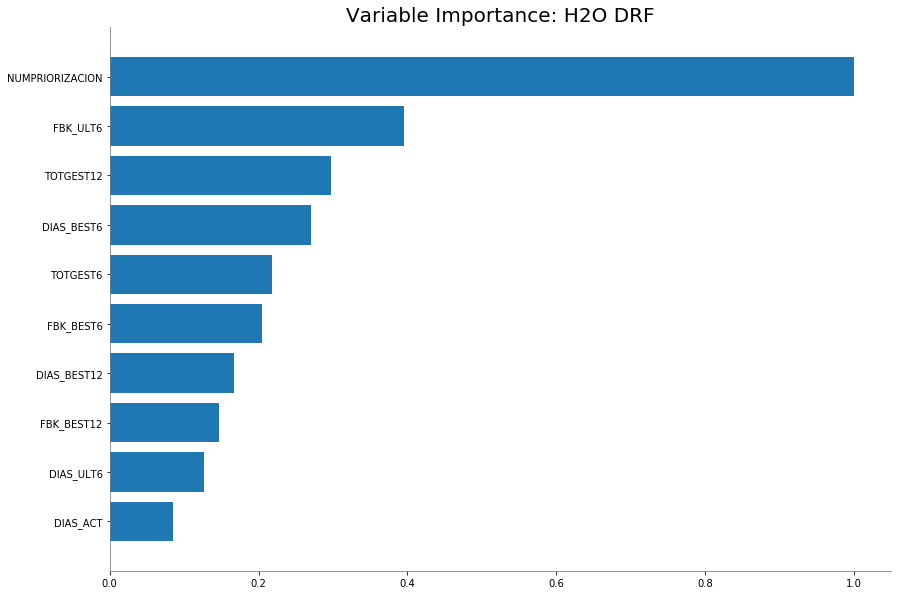

In [25]:
m.varimp_plot()

In [26]:
performance = m.model_performance(data)

In [27]:
performance


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.17070967758268601
RMSE: 0.4131702767415464
LogLoss: 0.5190849935730444
Mean Per-Class Error: 0.26229305946957404
AUC: 0.7972573537489746
AUCPR: 0.8610152735611486
Gini: 0.5945147074979491

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42797929697240916: 


,,no,si,Error,Rate
0,no,103517.0,161483.0,0.6094,(161483.0/265000.0)
1,si,32572.0,459819.0,0.0662,(32572.0/492391.0)
2,Total,136089.0,621302.0,0.2562,(194055.0/757391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.427979,0.825755,290.0
1,max f2,0.302782,0.908269,354.0
2,max f0point5,0.715791,0.817092,140.0
3,max accuracy,0.547815,0.763386,227.0
4,max precision,0.858954,0.983121,1.0
5,max recall,0.223763,1.000000,399.0
6,max specificity,0.859968,0.999770,0.0
7,max absolute_mcc,0.550667,0.471173,226.0
8,max min_per_class_accuracy,0.699500,0.732766,154.0
9,max mean_per_class_accuracy,0.715791,0.737707,140.0



Gains/Lift Table: Avg response rate: 65,01 %, avg score: 65,01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010007,0.858079,1.458226,1.458226,0.948014,0.859019,0.948014,0.859019,0.014592,0.014592,45.822621,45.822621
1,,2,0.020095,0.857240,1.446595,1.452387,0.940453,0.857577,0.944218,0.858295,0.014594,0.029186,44.659529,45.238706
2,,3,0.031424,0.856536,1.425246,1.442603,0.926573,0.856928,0.937857,0.857802,0.016146,0.045332,42.524614,44.260265
3,,4,0.040374,0.856151,1.445159,1.443169,0.939519,0.856375,0.938226,0.857486,0.012935,0.058267,44.515906,44.316937
4,,5,0.051083,0.855752,1.437490,1.441979,0.934533,0.855872,0.937452,0.857147,0.015394,0.073661,43.749002,44.197875
5,,6,0.103860,0.853848,1.408125,1.424776,0.915443,0.854669,0.926268,0.855888,0.074317,0.147978,40.812531,42.477596
6,,7,0.150002,0.849525,1.362306,1.405560,0.885655,0.852742,0.913775,0.854920,0.062859,0.210837,36.230647,40.556003
7,,8,0.202033,0.838882,1.311217,1.381263,0.852441,0.843007,0.897979,0.851852,0.068224,0.279061,31.121657,38.126297
8,,9,0.300011,0.801772,1.293433,1.352579,0.840880,0.823564,0.879332,0.842614,0.126729,0.405789,29.343288,35.257922
9,,10,0.401056,0.776788,1.322586,1.345023,0.859833,0.783750,0.874419,0.827783,0.133640,0.539429,32.258628,34.502263


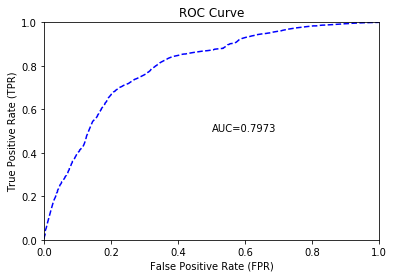

In [28]:
performance.plot(type="roc")

In [29]:
print(performance)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.17070967758268601
RMSE: 0.4131702767415464
LogLoss: 0.5190849935730444
Mean Per-Class Error: 0.26229305946957404
AUC: 0.7972573537489746
AUCPR: 0.8610152735611486
Gini: 0.5945147074979491

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42797929697240916: 


,,no,si,Error,Rate
0,no,103517.0,161483.0,0.6094,(161483.0/265000.0)
1,si,32572.0,459819.0,0.0662,(32572.0/492391.0)
2,Total,136089.0,621302.0,0.2562,(194055.0/757391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.427979,0.825755,290.0
1,max f2,0.302782,0.908269,354.0
2,max f0point5,0.715791,0.817092,140.0
3,max accuracy,0.547815,0.763386,227.0
4,max precision,0.858954,0.983121,1.0
5,max recall,0.223763,1.000000,399.0
6,max specificity,0.859968,0.999770,0.0
7,max absolute_mcc,0.550667,0.471173,226.0
8,max min_per_class_accuracy,0.699500,0.732766,154.0
9,max mean_per_class_accuracy,0.715791,0.737707,140.0



Gains/Lift Table: Avg response rate: 65,01 %, avg score: 65,01 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010007,0.858079,1.458226,1.458226,0.948014,0.859019,0.948014,0.859019,0.014592,0.014592,45.822621,45.822621
1,,2,0.020095,0.857240,1.446595,1.452387,0.940453,0.857577,0.944218,0.858295,0.014594,0.029186,44.659529,45.238706
2,,3,0.031424,0.856536,1.425246,1.442603,0.926573,0.856928,0.937857,0.857802,0.016146,0.045332,42.524614,44.260265
3,,4,0.040374,0.856151,1.445159,1.443169,0.939519,0.856375,0.938226,0.857486,0.012935,0.058267,44.515906,44.316937
4,,5,0.051083,0.855752,1.437490,1.441979,0.934533,0.855872,0.937452,0.857147,0.015394,0.073661,43.749002,44.197875
5,,6,0.103860,0.853848,1.408125,1.424776,0.915443,0.854669,0.926268,0.855888,0.074317,0.147978,40.812531,42.477596
6,,7,0.150002,0.849525,1.362306,1.405560,0.885655,0.852742,0.913775,0.854920,0.062859,0.210837,36.230647,40.556003
7,,8,0.202033,0.838882,1.311217,1.381263,0.852441,0.843007,0.897979,0.851852,0.068224,0.279061,31.121657,38.126297
8,,9,0.300011,0.801772,1.293433,1.352579,0.840880,0.823564,0.879332,0.842614,0.126729,0.405789,29.343288,35.257922
9,,10,0.401056,0.776788,1.322586,1.345023,0.859833,0.783750,0.874419,0.827783,0.133640,0.539429,32.258628,34.502263


In [30]:
m.train(predictors, target, data)

drf Model Build progress: |███████████████████████████████████████████████| 100%


<a id='part7'></a>
# Performance del modelo

In [31]:
FileCSV="D:/Python/3. Nivel III/2/datos/data_selec_test.csv"
dataCSV2=pd.read_csv(FileCSV)
dataCSV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548214 entries, 0 to 548213
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NUMPRIORIZACION       548214 non-null  int64  
 1   NC_DISTR12            548214 non-null  float64
 2   TOTGEST6              548214 non-null  int64  
 3   TOTGEST12             548214 non-null  int64  
 4   IDGRUPO               548214 non-null  int64  
 5   DIAS_ACT              548214 non-null  int64  
 6   FBK_ULT6              548214 non-null  object 
 7   FBK_ULT12             548214 non-null  object 
 8   FBK_BEST6             548214 non-null  object 
 9   DIAS_BEST6            548214 non-null  int64  
 10  DIAS_ULT6             548214 non-null  int64  
 11  FBK_BEST12            548214 non-null  object 
 12  DIAS_BEST12           548214 non-null  int64  
 13  DIAS_ULT12            548214 non-null  int64  
 14  CNE_CTD12             548214 non-null  int64  
 15  

In [32]:
dataCSV2 = dataCSV2.astype({"TARGET":"object"})

In [33]:
dataCSV2["TARGET"]=dataCSV2["TARGET"].replace(1,"si")
dataCSV2["TARGET"]=dataCSV2["TARGET"].replace(0,"no")

In [34]:
data2=h2o.H2OFrame(dataCSV2) 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [67]:
#test = h2o.import_file("D:/Python/3. Nivel III/2/datos/data_selec_test.csv")

In [35]:
performance = m.model_performance(test_data=data2)

print (performance)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.25533959554560687
RMSE: 0.5053113847377743
LogLoss: 0.7189852721543291
Mean Per-Class Error: 0.26473543131463284
AUC: 0.7963173138754902
AUCPR: 0.4782254045031899
Gini: 0.5926346277509804

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7301962568589405: 


,,no,si,Error,Rate
0,no,340429.0,92541.0,0.2137,(92541.0/432970.0)
1,si,37930.0,77314.0,0.3291,(37930.0/115244.0)
2,Total,378359.0,169855.0,0.238,(130471.0/548214.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.730196,0.542366,120.0
1,max f2,0.547819,0.673214,226.0
2,max f0point5,0.776848,0.490960,84.0
3,max accuracy,0.845943,0.801621,16.0
4,max precision,0.860034,0.756019,0.0
5,max recall,0.229712,1.000000,399.0
6,max specificity,0.860034,0.999649,0.0
7,max absolute_mcc,0.730196,0.402803,120.0
8,max min_per_class_accuracy,0.698358,0.730457,148.0
9,max mean_per_class_accuracy,0.584047,0.735265,207.0



Gains/Lift Table: Avg response rate: 21,02 %, avg score: 55,02 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010058,0.857004,3.232576,3.232576,0.679543,0.858133,0.679543,0.858133,0.032514,0.032514,223.257589,223.257589
1,,2,0.020362,0.855792,2.962484,3.095897,0.622765,0.856391,0.650811,0.857252,0.030527,0.063040,196.248431,209.589692
2,,3,0.031088,0.855031,3.007903,3.065538,0.632313,0.855299,0.644429,0.856578,0.032262,0.095302,200.790321,206.553824
3,,4,0.040008,0.854287,2.761775,2.997814,0.580573,0.854486,0.630192,0.856111,0.024635,0.119937,176.177524,199.781376
4,,5,0.050420,0.853583,2.517669,2.898661,0.529257,0.853752,0.609348,0.855624,0.026214,0.146151,151.766858,189.866146
5,,6,0.100716,0.838882,2.174656,2.537105,0.457150,0.846014,0.533343,0.850825,0.109377,0.255527,117.465630,153.710471
6,,7,0.150031,0.815930,2.052709,2.377885,0.431515,0.829421,0.499872,0.843790,0.101229,0.356756,105.270905,137.788531
7,,8,0.200017,0.783319,1.868909,2.250688,0.392877,0.798889,0.473133,0.832568,0.093419,0.450175,86.890860,125.068755
8,,9,0.300184,0.740009,2.054029,2.185065,0.431792,0.764355,0.459338,0.809806,0.205746,0.655921,105.402866,118.506527
9,,10,0.400158,0.665893,1.041195,1.899286,0.218877,0.704852,0.399262,0.783585,0.104092,0.760014,4.119536,89.928551


In [70]:
performance.auc()

0.7963173138754902

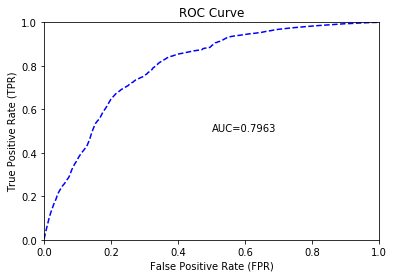

In [36]:
performance.plot(type="roc")

In [37]:
ℎ2𝑜.𝑠ℎ𝑢𝑡𝑑𝑜𝑤𝑛()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_b5f3 closed.
